#  IMPORT DATA

In [2]:
import numpy as np #for working with arrays
import pandas as pd #provides numerous tools for data analysis
import json # for JSON files
import datetime as dt
import hmac #a Python package that uses Hamiltonian Monte Carlo (HMC) to sample from probability distributions
import requests # library to handle requests
from pandas.io.json import json_normalize #for normalization
import matplotlib.cm as cm # Matplotlib for plotting modules
import matplotlib.colors as colors

In [4]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim #for getting logitude and latitude from address

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\munez\anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38haa244fe_0         3.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be UPDATED:

  conda                                4.9.2-py38haa244fe_0 --> 4.10.1-py38haa244fe_0




geographiclib-1.50   | 34 KB   

In [7]:
!pip install folium
import folium #importing folium so we can render maps
print('Import complete')

Import complete


### Importing the data from the site with read_csv

In [8]:
price_df = pd.read_csv("http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-monthly-update-new-version.csv")

In [9]:
price_df.head()

,{C18F412A-7CAA-81A6-E053-6B04A8C0AD18},330000,2002-04-05 00:00,SW5 0PH,F,N,L,26 - 28,FLAT 20,COURTFIELD GARDENS,Unnamed: 10,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,A.1
0,{C18F412A-9C49-81A6-E053-6B04A8C0AD18},178000,2002-11-29 00:00,SA39 9HL,D,N,F,GELLI FEDW,NaN,NaN,NaN,PENCADER,CARMARTHENSHIRE,CARMARTHENSHIRE,A,A
1,{C18F412A-C3AB-81A6-E053-6B04A8C0AD18},305000,2002-06-11 00:00,CO6 3RR,D,N,F,HALF A LOAF COTTAGE,NaN,RECTORY ROAD,ALDHAM,COLCHESTER,COLCHESTER,ESSEX,A,A
2,{C18F412A-CB62-81A6-E053-6B04A8C0AD18},64995,2002-08-23 00:00,WA3 3XJ,S,N,L,61,NaN,COTTESMORE WAY,GOLBORNE,WARRINGTON,WIGAN,GREATER MANCHESTER,A,A
3,{C18F412A-D716-81A6-E053-6B04A8C0AD18},315000,2002-05-10 00:00,HP2 6HR,D,N,F,THE PLOUGH,NaN,JOCKEY END,GADDESDEN ROW,HEMEL HEMPSTEAD,DACORUM,HERTFORDSHIRE,A,A
4,{C18F412B-7276-81A6-E053-6B04A8C0AD18},313500,2002-06-10 00:00,LL53 7BT,S,N,F,HYFRYDLE,NaN,NaN,BWLCHTOCYN,PWLLHELI,GWYNEDD,GWYNEDD,A,A


In [10]:
price_df.columns = ['ID', 'Price', 'TransferDate', 'Postcode', 'TypeProp', 'New-Old',\
                         'frhld_lease', 'PrimAdrs', 'ScndAdrs', 'Street', 'Locality', 'Town_City',\
                         'District', 'County', 'stnrd_addtnl', 'site']
price_df.head(100)

,ID,Price,TransferDate,Postcode,TypeProp,New-Old,frhld_lease,PrimAdrs,ScndAdrs,Street,Locality,Town_City,District,County,stnrd_addtnl,site
0,{C18F412A-9C49-81A6-E053-6B04A8C0AD18},178000,2002-11-29 00:00,SA39 9HL,D,N,F,GELLI FEDW,NaN,NaN,NaN,PENCADER,CARMARTHENSHIRE,CARMARTHENSHIRE,A,A
1,{C18F412A-C3AB-81A6-E053-6B04A8C0AD18},305000,2002-06-11 00:00,CO6 3RR,D,N,F,HALF A LOAF COTTAGE,NaN,RECTORY ROAD,ALDHAM,COLCHESTER,COLCHESTER,ESSEX,A,A
2,{C18F412A-CB62-81A6-E053-6B04A8C0AD18},64995,2002-08-23 00:00,WA3 3XJ,S,N,L,61,NaN,COTTESMORE WAY,GOLBORNE,WARRINGTON,WIGAN,GREATER MANCHESTER,A,A
3,{C18F412A-D716-81A6-E053-6B04A8C0AD18},315000,2002-05-10 00:00,HP2 6HR,D,N,F,THE PLOUGH,NaN,JOCKEY END,GADDESDEN ROW,HEMEL HEMPSTEAD,DACORUM,HERTFORDSHIRE,A,A
4,{C18F412B-7276-81A6-E053-6B04A8C0AD18},313500,2002-06-10 00:00,LL53 7BT,S,N,F,HYFRYDLE,NaN,NaN,BWLCHTOCYN,PWLLHELI,GWYNEDD,GWYNEDD,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,{C18F412A-C20B-81A6-E053-6B04A8C0AD18},272000,2003-02-11 00:00,CM7 4RE,T,N,F,TOWN HOUSE COTTAGE,NaN,HIGH STREET,GREAT BARDFIELD,BRAINTREE,BRAINTREE,ESSEX,A,A
96,{C18F412A-C601-81A6-E053-6B04A8C0AD18},449000,2003-01-15 00:00,CM1 2GR,S,N,F,23,NaN,WINDLEY TYE,NaN,CHELMSFORD,CHELMSFORD,ESSEX,A,A
97,{C18F412A-D0C3-81A6-E053-6B04A8C0AD18},249950,2003-08-21 00:00,GL55 6JQ,F,N,L,THE MULBERRY,NaN,CALF LANE,NaN,CHIPPING CAMPDEN,COTSWOLD,GLOUCESTERSHIRE,A,A
98,{C18F412A-D1AA-81A6-E053-6B04A8C0AD18},150000,2003-06-13 00:00,GL52 6DJ,T,N,F,CARLTON COTTAGE,NaN,SIDNEY STREET,NaN,CHELTENHAM,CHELTENHAM,GLOUCESTERSHIRE,A,A


In [11]:
price_df.shape

(95311, 16)

###  Cleaning Data

In [12]:
# Convert the date from string to datetime so we can work with it
price_df['TransferDate'] = price_df['TransferDate'].apply(pd.to_datetime)

#We will delete past transactions which happend till 2019 because we are interested in latest transactions only
price_df.drop(price_df[price_df.TransferDate.dt.year < 2020].index, inplace=True) 

#And we will sort by the date of transfer now that it is in datetime
price_df.sort_values(by=['TransferDate'],ascending=[False],inplace=True)

In [15]:
price_df.head()

,ID,Price,TransferDate,Postcode,TypeProp,New-Old,frhld_lease,PrimAdrs,ScndAdrs,Street,Locality,Town_City,District,County,stnrd_addtnl,site
82573,{C18F412B-6C64-81A6-E053-6B04A8C0AD18},330000,2021-04-27,SA10 7UP,D,N,F,20,NaN,BIRCHWOOD CLOSE,NaN,NEATH,NEATH PORT TALBOT,NEATH PORT TALBOT,A,A
66183,{C18F412A-9D50-81A6-E053-6B04A8C0AD18},285000,2021-04-27,LL16 3ET,D,N,F,4,NaN,LLYS GWYDYR,NaN,DENBIGH,DENBIGHSHIRE,DENBIGHSHIRE,A,A
91154,{C18F412B-9B93-81A6-E053-6B04A8C0AD18},50000,2021-04-26,TS3 9BN,T,N,F,59,NaN,THORNTREE AVENUE,NaN,MIDDLESBROUGH,MIDDLESBROUGH,MIDDLESBROUGH,B,A
15804,{C18F412A-AB0F-81A6-E053-6B04A8C0AD18},242000,2021-04-26,BH8 8RY,S,N,F,65A,NaN,CAPSTONE ROAD,NaN,BOURNEMOUTH,"BOURNEMOUTH, CHRISTCHURCH AND POOLE","BOURNEMOUTH, CHRISTCHURCH AND POOLE",A,A
38036,{C18F412B-2D38-81A6-E053-6B04A8C0AD18},300000,2021-04-26,NG9 5JH,D,N,F,14,NaN,BURGH HALL CLOSE,BEESTON,NOTTINGHAM,BROXTOWE,NOTTINGHAMSHIRE,A,A


In [17]:
#new size of our data
price_df.shape

(91516, 16)

As per our problem we need to check prices in London

In [18]:
df_london = price_df.query("Town_City == 'LONDON'") # Lets filter so we can only check prices in London
streets = df_london['Street'].unique().tolist()
streets

['SILVERTON ROAD',
 'TORR ROAD',
 'CRYSTAL PALACE ROAD',
 'NORMANSHIRE DRIVE',
 'GROVE END ROAD',
 'WINDMILL LANE',
 'EARLS MEWS',
 'HASTINGS STREET',
 'OAKLEY STREET',
 'EVE ROAD',
 'MENDORA ROAD',
 'BROXHOLM ROAD',
 'MORTIMER CRESCENT',
 'HOWARD ROAD',
 'CHISWICK HIGH ROAD',
 'MANOR PARK',
 'LUTON ROAD',
 'CHISWICK ROAD',
 'EDITH GROVE',
 'TRENTHAM STREET',
 'SAVERNAKE ROAD',
 'SANDFORD ROAD',
 'KINGSLAND ROAD',
 'VILLIERS GARDENS',
 'CLARENDON ROAD',
 'ESSEX CLOSE',
 'PROVIDENCE SQUARE',
 'CORPORATION STREET',
 'SHERBROOKE ROAD',
 'WARTON ROAD',
 'MANOR MOUNT',
 'BROADFIELD CLOSE',
 'TIERNEY ROAD',
 'LISSENDEN GARDENS',
 'PLOWMAN CLOSE',
 'ASHEN GROVE',
 'TOWER GARDENS ROAD',
 'FINCHLEY ROAD',
 'TREMAINE ROAD',
 'HALE GROVE GARDENS',
 'BRUNSWICK ROAD',
 'FIFTH AVENUE',
 'GROVE PARK ROAD',
 'OLDFIELD ROAD',
 'MILLES SQUARE',
 'THORNHILL GARDENS',
 'TASSO ROAD',
 'HALLEY ROAD',
 'THE HIGHWAY',
 'BRIDGE MEADOWS',
 'DULWICH ROAD',
 'POPLAR GROVE',
 'DECIMA STREET',
 'BREWSTER GARDENS',


Now we can check the average price for every street.

In [19]:
london_grp_price = df_london.groupby(['Street'])['Price'].mean().reset_index() # lets get the avarage price for every street
london_grp_price.columns = ['Street', 'Avg_Price'] # lets create columns for the street according to price

In [61]:
london_budget = london_grp_price.query("(Avg_Price >= 2000) & (Avg_Price <= 15000)") # because our price limit is 9k

In [62]:
london_budget

,Street,Avg_Price
11,ABERNETHY ROAD,5000.0
950,CRANBROOK PARK,5100.0
1057,DAWS HILL,5000.0
1075,DELAWYK CRESCENT,7396.0
1787,HIGHBURY STADIUM SQUARE,10000.0
1947,KATHERINE ROAD,8450.0
2635,PANTON STREET,15000.0
3680,WAVERLEY ROAD,15000.0
3693,WELL STREET,2500.0


In [26]:
from geopy.distance import geodesic
from sklearn.cluster import KMeans #lets import k-means
import numpy as np
import datetime as DT
import hmac
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [63]:
for index, item in london_budget.iterrows():
    print(f"index: {index}")
    print(f"item: {item}")
    print(f"item.Street only: {item.Street}")

index: 11
item: Street       ABERNETHY ROAD
Avg_Price              5000
Name: 11, dtype: object
item.Street only: ABERNETHY ROAD
index: 950
item: Street       CRANBROOK PARK
Avg_Price              5100
Name: 950, dtype: object
item.Street only: CRANBROOK PARK
index: 1057
item: Street       DAWS HILL
Avg_Price         5000
Name: 1057, dtype: object
item.Street only: DAWS HILL
index: 1075
item: Street       DELAWYK CRESCENT
Avg_Price                7396
Name: 1075, dtype: object
item.Street only: DELAWYK CRESCENT
index: 1787
item: Street       HIGHBURY STADIUM SQUARE
Avg_Price                      10000
Name: 1787, dtype: object
item.Street only: HIGHBURY STADIUM SQUARE
index: 1947
item: Street       KATHERINE ROAD
Avg_Price              8450
Name: 1947, dtype: object
item.Street only: KATHERINE ROAD
index: 2635
item: Street       PANTON STREET
Avg_Price            15000
Name: 2635, dtype: object
item.Street only: PANTON STREET
index: 3680
item: Street       WAVERLEY ROAD
Avg_Price      

In [28]:
geolocator = Nominatim(user_agent = "city")

In [64]:
london_budget['city_coord'] = london_budget['Street'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

<ipython-input-64-21d0d23d6159>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  london_budget['city_coord'] = london_budget['Street'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))


In [66]:
london_budget

,Street,Avg_Price,city_coord
11,ABERNETHY ROAD,5000.0,"(45.3636003, -122.5940822)"
950,CRANBROOK PARK,5100.0,"(-19.30676875, 146.7593502169497)"
1057,DAWS HILL,5000.0,"(51.6172384, -0.7466435219576584)"
1075,DELAWYK CRESCENT,7396.0,"(51.4524473, -0.0936289)"
1787,HIGHBURY STADIUM SQUARE,10000.0,"(53.9164021, -3.024682725475497)"
1947,KATHERINE ROAD,8450.0,"(51.5372779, 0.0443721)"
2635,PANTON STREET,15000.0,"(51.5093106, -0.1322085)"
3680,WAVERLEY ROAD,15000.0,"(44.7664996, -63.5765747)"
3693,WELL STREET,2500.0,"(51.8980141, 7.4073521)"


In [67]:
london_budget[['Latitude', 'Longitude']] = london_budget['city_coord'].apply(pd.Series) # add them in columns

C:\Users\munez\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [68]:
london_budget

,Street,Avg_Price,city_coord,Latitude,Longitude
11,ABERNETHY ROAD,5000.0,"(45.3636003, -122.5940822)",45.363600,-122.594082
950,CRANBROOK PARK,5100.0,"(-19.30676875, 146.7593502169497)",-19.306769,146.759350
1057,DAWS HILL,5000.0,"(51.6172384, -0.7466435219576584)",51.617238,-0.746644
1075,DELAWYK CRESCENT,7396.0,"(51.4524473, -0.0936289)",51.452447,-0.093629
1787,HIGHBURY STADIUM SQUARE,10000.0,"(53.9164021, -3.024682725475497)",53.916402,-3.024683
1947,KATHERINE ROAD,8450.0,"(51.5372779, 0.0443721)",51.537278,0.044372
2635,PANTON STREET,15000.0,"(51.5093106, -0.1322085)",51.509311,-0.132209
3680,WAVERLEY ROAD,15000.0,"(44.7664996, -63.5765747)",44.766500,-63.576575
3693,WELL STREET,2500.0,"(51.8980141, 7.4073521)",51.898014,7.407352


## PLOTTING MAP

In [34]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [101]:
london_budget.sort_values('Avg_Price',ascending=False, inplace=False)

,Street,Avg_Price,city_coord,Latitude,Longitude
2635,PANTON STREET,15000.0,"(51.5093106, -0.1322085)",51.509311,-0.132209
3680,WAVERLEY ROAD,15000.0,"(44.7664996, -63.5765747)",44.766500,-63.576575
1787,HIGHBURY STADIUM SQUARE,10000.0,"(53.9164021, -3.024682725475497)",53.916402,-3.024683
1947,KATHERINE ROAD,8450.0,"(51.5372779, 0.0443721)",51.537278,0.044372
1075,DELAWYK CRESCENT,7396.0,"(51.4524473, -0.0936289)",51.452447,-0.093629
950,CRANBROOK PARK,5100.0,"(-19.30676875, 146.7593502169497)",-19.306769,146.759350
11,ABERNETHY ROAD,5000.0,"(45.3636003, -122.5940822)",45.363600,-122.594082
1057,DAWS HILL,5000.0,"(51.6172384, -0.7466435219576584)",51.617238,-0.746644
3693,WELL STREET,2500.0,"(51.8980141, 7.4073521)",51.898014,7.407352


In [74]:
london_budget

,Street,Avg_Price,city_coord,Latitude,Longitude
3693,WELL STREET,2500.0,"(51.8980141, 7.4073521)",51.898014,7.407352
11,ABERNETHY ROAD,5000.0,"(45.3636003, -122.5940822)",45.363600,-122.594082
1057,DAWS HILL,5000.0,"(51.6172384, -0.7466435219576584)",51.617238,-0.746644
950,CRANBROOK PARK,5100.0,"(-19.30676875, 146.7593502169497)",-19.306769,146.759350
1075,DELAWYK CRESCENT,7396.0,"(51.4524473, -0.0936289)",51.452447,-0.093629
1947,KATHERINE ROAD,8450.0,"(51.5372779, 0.0443721)",51.537278,0.044372
1787,HIGHBURY STADIUM SQUARE,10000.0,"(53.9164021, -3.024682725475497)",53.916402,-3.024683
2635,PANTON STREET,15000.0,"(51.5093106, -0.1322085)",51.509311,-0.132209
3680,WAVERLEY ROAD,15000.0,"(44.7664996, -63.5765747)",44.766500,-63.576575


### Lets check the geographic co-ordinates for LONDON and have a view of its map

In [72]:
address = 'LONDON, England'
geolocator = Nominatim(user_agent='city')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are are 51.5073219, -0.1276474.


In [102]:
london_map = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map
for lat, lng, price, street in zip(london_budget['Latitude'], london_budget['Longitude'], london_budget['Avg_Price'], london_budget['Street']):
    label = '{}, {}'.format(street, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(london_map)  
    
london_map

With the help of FourSquare API , we will explore the location

In [75]:
CLIENT_ID = 'IHFG03FKMWGMFU5VCSSXERLAGQJ3AVOVHRC1OF1L2JGZGP5L' # Foursquare ID
CLIENT_SECRET = 'HC1AX21T2WBLYQDLHUU2WJDSGRWECE1BHJCQEED1N1KCFLPV' # Foursquare Secret
VERSION = '20181206' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IHFG03FKMWGMFU5VCSSXERLAGQJ3AVOVHRC1OF1L2JGZGP5L
CLIENT_SECRET:HC1AX21T2WBLYQDLHUU2WJDSGRWECE1BHJCQEED1N1KCFLPV


In [76]:
#Lets see the nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT=200):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Street', 
                  'Street Latitude', 
                  'Street Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue_Category']
    return(nearby_venues)

In [77]:
location_venues = getNearbyVenues(names=london_budget['Street'],
                                   latitudes=london_budget['Latitude'],
                                   longitudes=london_budget['Longitude']
                                  )

WELL STREET
ABERNETHY ROAD
DAWS HILL
CRANBROOK PARK
DELAWYK CRESCENT
KATHERINE ROAD
HIGHBURY STADIUM SQUARE
PANTON STREET
WAVERLEY ROAD


In [78]:
#complete details of nearby streets alongwith venue Category
pd.DataFrame.from_dict(location_venues) # Convert to pandas Dataframe
location_venues

,Street,Street Latitude,Street Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
0,WELL STREET,51.898014,7.407352,AS Nottuln (4),51.906647,7.406039,Intersection
1,ABERNETHY ROAD,45.363600,-122.594082,Oregon City Brewing Company,45.361706,-122.599982,Brewery
2,ABERNETHY ROAD,45.363600,-122.594082,Pioneer Pizza Take-n-Bake,45.363932,-122.586149,Pizza Place
3,ABERNETHY ROAD,45.363600,-122.594082,End Of The Oregon Trail,45.364643,-122.594520,History Museum
4,ABERNETHY ROAD,45.363600,-122.594082,Michaels,45.369211,-122.598788,Arts & Crafts Store
...,...,...,...,...,...,...,...
278,PANTON STREET,51.509311,-0.132209,Yauatcha,51.513732,-0.135264,Dim Sum Restaurant
279,PANTON STREET,51.509311,-0.132209,Soho Grind,51.512120,-0.138284,Coffee Shop
280,PANTON STREET,51.509311,-0.132209,Seven Dials,51.513779,-0.126948,Neighborhood
281,PANTON STREET,51.509311,-0.132209,Bao,51.513319,-0.136403,Taiwanese Restaurant


categories we are only interested in Pubs , Pizza Places and Fast Food Restaurants

In [79]:
location_venues = location_venues[(location_venues.Venue_Category == 'Pizza Place') | (location_venues.Venue_Category == 'Pub') | (location_venues.Venue_Category == 'Fast Food Restaurant')]
location_venues

,Street,Street Latitude,Street Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
2,ABERNETHY ROAD,45.363600,-122.594082,Pioneer Pizza Take-n-Bake,45.363932,-122.586149,Pizza Place
47,CRANBROOK PARK,-19.306769,146.759350,Domino's Pizza,-19.301159,146.761698,Pizza Place
50,CRANBROOK PARK,-19.306769,146.759350,KFC,-19.307692,146.750911,Fast Food Restaurant
61,DELAWYK CRESCENT,51.452447,-0.093629,Half Moon,51.452650,-0.100722,Pub
67,DELAWYK CRESCENT,51.452447,-0.093629,500 Degrees,51.452480,-0.102106,Pizza Place
78,DELAWYK CRESCENT,51.452447,-0.093629,The Florence,51.452631,-0.102906,Pub
79,DELAWYK CRESCENT,51.452447,-0.093629,The Commercial,51.453128,-0.102550,Pub
84,DELAWYK CRESCENT,51.452447,-0.093629,The Prince Regent,51.453695,-0.106559,Pub
85,DELAWYK CRESCENT,51.452447,-0.093629,Crown & Greyhound,51.449414,-0.085013,Pub
96,DELAWYK CRESCENT,51.452447,-0.093629,PizzaExpress,51.453025,-0.101316,Pizza Place


In [80]:
#check which  street has maximum options
location_venues.groupby('Street').count()

,Street Latitude,Street Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
Street,,,,,,
ABERNETHY ROAD,1,1,1,1,1,1
CRANBROOK PARK,2,2,2,2,2,2
DELAWYK CRESCENT,10,10,10,10,10,10
HIGHBURY STADIUM SQUARE,3,3,3,3,3,3
KATHERINE ROAD,8,8,8,8,8,8
PANTON STREET,1,1,1,1,1,1


In [81]:
# one hot encoding
venues_onehot = pd.get_dummies(location_venues[['Venue_Category']], prefix="", prefix_sep="")
# add street column back to dataframe
venues_onehot['Street'] = location_venues['Street'] 
# move street column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
fixed_columns
venues_onehot = venues_onehot[fixed_columns]
venues_onehot

,Street,Fast Food Restaurant,Pizza Place,Pub
2,ABERNETHY ROAD,0,1,0
47,CRANBROOK PARK,0,1,0
50,CRANBROOK PARK,1,0,0
61,DELAWYK CRESCENT,0,0,1
67,DELAWYK CRESCENT,0,1,0
78,DELAWYK CRESCENT,0,0,1
79,DELAWYK CRESCENT,0,0,1
84,DELAWYK CRESCENT,0,0,1
85,DELAWYK CRESCENT,0,0,1
96,DELAWYK CRESCENT,0,1,0


In [95]:
venues_grouped = venues_onehot.groupby('Street').mean().reset_index()
venues_grouped

,Street,Fast Food Restaurant,Pizza Place,Pub
0,ABERNETHY ROAD,0.000000,1.000,0.000000
1,CRANBROOK PARK,0.500000,0.500,0.000000
2,DELAWYK CRESCENT,0.000000,0.500,0.500000
3,HIGHBURY STADIUM SQUARE,0.333333,0.000,0.666667
4,KATHERINE ROAD,0.500000,0.125,0.375000
5,PANTON STREET,0.000000,0.000,1.000000


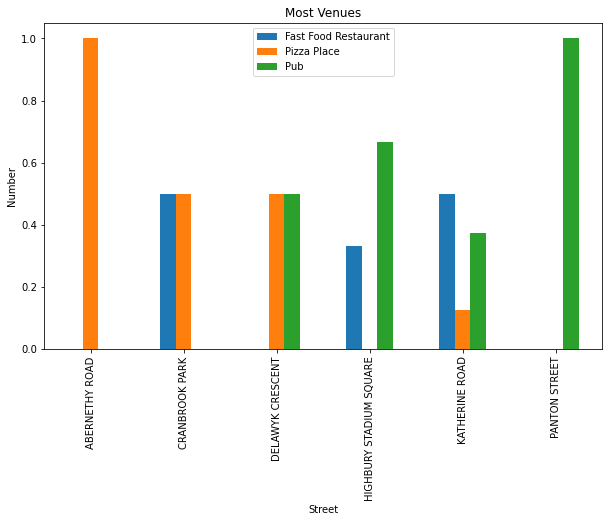

In [103]:
venues_grouped.plot(y = ["Fast Food Restaurant", "Pizza Place", "Pub"], x ="Street", kind='bar', figsize=(10, 6))

plt.xlabel('Street') # add to x-label to the plot
plt.ylabel('Number') # add y-label to the plot
plt.title('Most Venues') # add title to the plot

plt.show()

In [83]:
num_top_venues = 5

for hood in venues_grouped['Street']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Street'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ABERNETHY ROAD----
                  venue  freq
0           Pizza Place   1.0
1  Fast Food Restaurant   0.0
2                   Pub   0.0


----CRANBROOK PARK----
                  venue  freq
0  Fast Food Restaurant   0.5
1           Pizza Place   0.5
2                   Pub   0.0


----DELAWYK CRESCENT----
                  venue  freq
0           Pizza Place   0.5
1                   Pub   0.5
2  Fast Food Restaurant   0.0


----HIGHBURY STADIUM SQUARE----
                  venue  freq
0                   Pub  0.67
1  Fast Food Restaurant  0.33
2           Pizza Place  0.00


----KATHERINE ROAD----
                  venue  freq
0  Fast Food Restaurant  0.50
1                   Pub  0.38
2           Pizza Place  0.12


----PANTON STREET----
                  venue  freq
0                   Pub   1.0
1  Fast Food Restaurant   0.0
2           Pizza Place   0.0




In [84]:
# Define a function to return the most common venues/facilities nearby real estate investments#

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [89]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Street']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [96]:
# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Street'] = venues_grouped['Street']

for ind in np.arange(venues_grouped.shape[0]):
    venues_sorted.iloc[ind, 0:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

ValueError: could not broadcast input array from shape (3) into shape (4)

In [90]:
kclusters = 2
london_clustering = venues_grouped.drop('Street', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 0, 0, 0, 0])

In [91]:
# add clustering labels
venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)

london_merged = london_budget

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
london_merged= london_merged.join(venues_sorted.set_index('Street'), on='Street')

london_merged
# check the last columns!

,Street,Avg_Price,city_coord,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3693,WELL STREET,2500.0,"(51.8980141, 7.4073521)",51.898014,7.407352,NaN,NaN,NaN,NaN,NaN,NaN
11,ABERNETHY ROAD,5000.0,"(45.3636003, -122.5940822)",45.363600,-122.594082,1.0,NaN,NaN,NaN,NaN,NaN
1057,DAWS HILL,5000.0,"(51.6172384, -0.7466435219576584)",51.617238,-0.746644,NaN,NaN,NaN,NaN,NaN,NaN
950,CRANBROOK PARK,5100.0,"(-19.30676875, 146.7593502169497)",-19.306769,146.759350,1.0,NaN,NaN,NaN,NaN,NaN
1075,DELAWYK CRESCENT,7396.0,"(51.4524473, -0.0936289)",51.452447,-0.093629,0.0,NaN,NaN,NaN,NaN,NaN
1947,KATHERINE ROAD,8450.0,"(51.5372779, 0.0443721)",51.537278,0.044372,0.0,NaN,NaN,NaN,NaN,NaN
1787,HIGHBURY STADIUM SQUARE,10000.0,"(53.9164021, -3.024682725475497)",53.916402,-3.024683,0.0,NaN,NaN,NaN,NaN,NaN
2635,PANTON STREET,15000.0,"(51.5093106, -0.1322085)",51.509311,-0.132209,0.0,NaN,NaN,NaN,NaN,NaN
3680,WAVERLEY ROAD,15000.0,"(44.7664996, -63.5765747)",44.766500,-63.576575,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
london_merged = london_merged[np.isfinite(london_merged['ClusterLabels'])]
london_merged = london_merged.astype({"ClusterLabels": int})     # because some of the labels were none we made them into ints
london_merged

,Street,Avg_Price,city_coord,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
11,ABERNETHY ROAD,5000.0,"(45.3636003, -122.5940822)",45.363600,-122.594082,1,NaN,NaN,NaN,NaN,NaN
950,CRANBROOK PARK,5100.0,"(-19.30676875, 146.7593502169497)",-19.306769,146.759350,1,NaN,NaN,NaN,NaN,NaN
1075,DELAWYK CRESCENT,7396.0,"(51.4524473, -0.0936289)",51.452447,-0.093629,0,NaN,NaN,NaN,NaN,NaN
1947,KATHERINE ROAD,8450.0,"(51.5372779, 0.0443721)",51.537278,0.044372,0,NaN,NaN,NaN,NaN,NaN
1787,HIGHBURY STADIUM SQUARE,10000.0,"(53.9164021, -3.024682725475497)",53.916402,-3.024683,0,NaN,NaN,NaN,NaN,NaN
2635,PANTON STREET,15000.0,"(51.5093106, -0.1322085)",51.509311,-0.132209,0,NaN,NaN,NaN,NaN,NaN


In [104]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Street'], london_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters